# Importing Libraries

In [152]:
# for data wrangling
import pandas as pd
import numpy as np


# for visualizations
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

# for pre-processing / models
from sklearn import tree
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (accuracy_score, 
                            classification_report,
                            recall_score, precision_score, f1_score,
                            confusion_matrix)
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

from category_encoders import TargetEncoder
from collections import Counter
from imblearn.over_sampling import SMOTE

from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LassoLars , LassoLarsCV , LassoCV
from sklearn.svm import SVR

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler


import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff


# Explainable AI 

#!pip install --quiet shap==0.39.0
import shap

%matplotlib inline

style.use('ggplot')
sns.set_style('darkgrid')
sns.set_palette('Set2')
pd. set_option("display.max_columns", None)

import warnings
warnings.filterwarnings('ignore')

import joblib
import pickle
import os



# Loading Dataset

In [2]:
pd.set_option('display.max_columns', 70)
missing_values = ['na','NaN']
train = pd.read_csv('train_dataset.csv')
test = pd.read_csv('x_test.csv')

In [3]:
train

Year_Factor State_Factor building_class  \
0                1      State_1     Commercial   
1                1      State_1     Commercial   
2                1      State_1     Commercial   
3                1      State_1     Commercial   
4                1      State_1     Commercial   
...            ...          ...            ...   
75752            6     State_11     Commercial   
75753            6     State_11    Residential   
75754            6     State_11     Commercial   
75755            6     State_11     Commercial   
75756            6     State_11    Residential   

                                   facility_type  floor_area  year_built  \
0                   Grocery_store_or_food_market     61242.0      1942.0   
1      Warehouse_Distribution_or_Shipping_center    274000.0      1955.0   
2                           Retail_Enclosed_mall    280025.0      1951.0   
3                      Education_Other_classroom     55325.0      1980.0   
4                      Warehouse_Nonrefrigerated     66000.0      1985.0   
...                                          ...         ...         ...   
75752                       Office_Uncategorized     20410.0      1995.0   
75753                        5plus_Unit_Building     40489.0      1910.0   
75754                           Commercial_Other     28072.0      1917.0   
75755                           Commercial_Other     53575.0      2012.0   
75756                         2to4_Unit_Building     23888.0      1974.0   

       energy_star_rating  ELEVATION  january_min_temp  january_avg_temp  \
0                    11.0        2.4                36         50.500000   
1                    45.0        1.8                36         50.500000   
2                    97.0        1.8                36         50.500000   
3                    46.0        1.8                36         50.500000   
4                   100.0        2.4                36         50.500000   
...                   ...        ...               ...               ...   
75752                 8.0       36.6                28         43.451613   
75753                98.0       36.6                28         43.451613   
75754                 NaN       36.6                26         36.612903   
75755                 NaN       36.6                26         36.612903   
75756                51.0       36.6                27         36.935484   

       january_max_temp  february_min_temp  february_avg_temp  \
0                    68                 35          50.589286   
1                    68                 35          50.589286   
2                    68                 35          50.589286   
3                    68                 35          50.589286   
4                    68                 35          50.589286   
...                 ...                ...                ...   
75752                56                 34          47.672414   
75753                56                 34          47.672414   
75754                48                 30          41.637931   
75755                48                 30          41.637931   
75756                51                 29          42.172414   

       february_max_temp  march_min_temp  march_avg_temp  march_max_temp  \
0                     73              40       53.693548              80   
1                     73              40       53.693548              80   
2                     73              40       53.693548              80   
3                     73              40       53.693548              80   
4                     73              40       53.693548              80   
...                  ...             ...             ...             ...   
75752                 64              35       49.354839              71   
75753                 64              35       49.354839              71   
75754                 58              29       41.338710              62   
75755                 58              2

In [4]:
test

Year_Factor State_Factor building_class                 facility_type  \
0               7      State_1     Commercial  Grocery_store_or_food_market   
1               7      State_1     Commercial  Grocery_store_or_food_market   
2               7      State_1     Commercial  Grocery_store_or_food_market   
3               7      State_1     Commercial  Grocery_store_or_food_market   
4               7      State_1     Commercial  Grocery_store_or_food_market   
...           ...          ...            ...                           ...   
9700            7     State_11    Residential           5plus_Unit_Building   
9701            7     State_11    Residential           5plus_Unit_Building   
9702            7     State_11    Residential           5plus_Unit_Building   
9703            7     State_11    Residential           5plus_Unit_Building   
9704            7     State_11    Residential           5plus_Unit_Building   

      floor_area  year_built  energy_star_rating  ELEVATION  january_min_temp  \
0        28484.0      1994.0                37.0        2.4                38   
1        21906.0      1961.0                55.0       45.7                38   
2        16138.0      1950.0                 1.0       59.1                38   
3        97422.0      1971.0                34.0       35.4                38   
4        61242.0      1942.0                35.0        1.8                38   
...          ...         ...                 ...        ...               ...   
9700    305925.0      2013.0                99.0      812.0                21   
9701     34909.0      1910.0                94.0       26.5                21   
9702     42393.0      2014.0                94.0      812.0                21   
9703     25368.0      1992.0                79.0      812.0                21   
9704     45640.0      1994.0                87.0       26.5                21   

      january_avg_temp  january_max_temp  february_min_temp  \
0            50.596774                64                 40   
1            50.596774                64                 40   
2            50.596774                64                 40   
3            50.596774                64                 40   
4            50.596774                64                 40   
...                ...               ...                ...   
9700         38.661290                54                 28   
9701         38.661290                54                 28   
9702         38.661290                54                 28   
9703         38.661290                54                 28   
9704         38.661290                54                 28   

      february_avg_temp  february_max_temp  march_min_temp  march_avg_temp  \
0             54.482143                 66              42       56.935484   
1             54.482143                 66              42       56.935484   
2             54.482143                 66              42       56.935484   
3             54.482143                 66              42       56.935484   
4             54.482143                 66              42       56.935484   
...                 ...                ...             ...             ...   
9700          41.625000                 59              33       46.500000   
9701          41.625000                 59              33       46.500000   
9702          41.625000                 59              33       46.500000   
9703          41.625000                 59              33       46.500000   
9704          41.625000                 59              33       46.500000   

      march_max_temp  april_min_temp  april_avg_temp  april_max_temp  \
0                 77              45       58.450000              78   
1                 77              45       58.450000              78   
2                 77              45       58.450000              78   
3                 77              45       58.450000              78   
4                 77          

In [5]:
df_train = train.copy()
df_test = test.copy()

In [6]:
print(df_train.shape)
print(df_test.shape)

(75757, 64)
(9705, 63)


In [7]:
df_train.rename(columns={
    'Year_Factor': 'year_factor', 
    'State_Factor': 'state_factor',
    'ELEVATION': 'elevation',
    'id': 'building_id'
}, inplace=True)

df_test.rename(columns={
    'Year_Factor': 'year_factor', 
    'State_Factor': 'state_factor',
    'ELEVATION': 'elevation',
    'id': 'building_id'
}, inplace=True)

# EDA

## Data Dictionary
### Covariates
**id**: building id

**Year_Factor**: anonymized year in which the weather and energy usage factors were observed

**State_Factor**: anonymized state in which the building is located

**building_class**: building classification

**facility_type**: building usage type

**floor_area**: floor area (in square feet) of the building

**year_built**: year in which the building was constructed

**energy_star_rating**: the energy star rating of the building

**ELEVATION**: elevation of the building location

**january_min_temp**: minimum temperature in January (in Fahrenheit) at the location of the building

**january_avg_temp**: average temperature in January (in Fahrenheit) at the location of the building

**january_max_temp**: maximum temperature in January (in Fahrenheit) at the location of the building

**cooling_degree_days**: cooling degree day for a given day is the number of degrees where the daily average temperature exceeds 65 degrees Fahrenheit. Each month is summed to produce an annual total at the location of the building.

**heating_degree_days**: heating degree day for a given day is the number of degrees where the daily average temperature falls under 65 degrees Fahrenheit. Each month is summed to produce an annual total at the location of the building.

**precipitation_inches**: annual precipitation in inches at the location of the building

**snowfall_inches**: annual snowfall in inches at the location of the building

**snowdepth_inches**: annual snow depth in inches at the location of the building

**avg_temp**: average temperature over a year at the location of the building

**days_below_30F**: total number of days below 30 degrees Fahrenheit at the location of the building

**days_below_20F**: total number of days below 20 degrees Fahrenheit at the location of the building

**days_below_10F**: total number of days below 10 degrees Fahrenheit at the location of the building

**days_below_0F**: total number of days below 0 degrees Fahrenheit at the location of the building

**days_above_80F**: total number of days above 80 degrees Fahrenheit at the location of the building

**days_above_90F**: total number of days above 90 degrees Fahrenheit at the location of the building

**days_above_100F**: total number of days above 100 degrees Fahrenheit at the location of the building

**days_above_110F**: total number of days above 110 degrees Fahrenheit at the location of the building

**direction_max_wind_speed**: wind direction for maximum wind speed at the location of the building. Given in 360-degree compass point directions (e.g. 360 = north, 180 = south, etc.).

**direction_peak_wind_speed**: wind direction for peak wind gust speed at the location of the building. Given in 360-degree compass point directions (e.g. 360 = north, 180 = south, etc.).

**max_wind_speed**: maximum wind speed at the location of the building

**days_with_fog**: number of days with fog at the location of the building

### Target
**site_eui**: Site Energy Usage Intensity is the amount of heat and electricity consumed by a building as reflected in utility bills

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year_factor                75757 non-null  int64  
 1   state_factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   elevation                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

In [9]:
#Checking for Duplicated Data
print(df_train.duplicated().sum())
print(df_test.duplicated().sum())

0
0


In [10]:
print([col for col in df_train if df_train[col].nunique()==1])
print([col for col in df_test if df_test[col].nunique()==1])

[]
['year_factor', 'days_above_110F']


In [11]:
df_train.describe(include=['O']).T

count unique                        top   freq
state_factor    75757      7                    State_6  50840
building_class  75757      2                Residential  43558
facility_type   75757     60  Multifamily_Uncategorized  39455

In [12]:
df_train.describe().T

count           mean            std         min  \
year_factor                75757.0       4.367755       1.471441    1.000000   
floor_area                 75757.0  165983.865858  246875.790940  943.000000   
year_built                 73920.0    1952.306764      37.053619    0.000000   
energy_star_rating         49048.0      61.048605      28.663683    0.000000   
elevation                  75757.0      39.506323      60.656596   -6.400000   
...                            ...            ...            ...         ...   
direction_peak_wind_speed  33946.0      62.779974     130.308106    1.000000   
max_wind_speed             34675.0       4.190601       6.458789    1.000000   
days_with_fog              29961.0     109.142051      50.699751   12.000000   
site_eui                   75757.0      82.584693      58.255403    1.001169   
building_id                75757.0   37878.000000   21869.306509    0.000000   

                                    25%           50%            75%  \
year_factor                    3.000000      5.000000       6.000000   
floor_area                 62379.000000  91367.000000  166000.000000   
year_built                  1927.000000   1951.000000    1977.000000   
energy_star_rating            40.000000     67.000000      85.000000   
elevation                     11.900000     25.000000      42.700000   
...                                 ...           ...            ...   
direction_peak_wind_speed      1.000000      1.000000       1.000000   
max_wind_speed                 1.000000      1.000000       1.000000   
days_with_fog                 88.000000    104.000000     131.000000   
site_eui                      54.528601     75.293716      97.277534   
building_id                18939.000000  37878.000000   56817.000000   

                                    max  
year_factor                6.000000e+00  
floor_area                 6.385382e+06  
year_built                 2.015000e+03  
energy_star_rating         1.000000e+02  
elevation                  1.924500e+03  
...                                 ...  
direction_peak_wind_speed  3.600000e+02  
max_wind_speed             2.330000e+01  
days_with_fog              3.110000e+02  
site_eui                   9.978661e+02  
building_id                7.575600e+04  

[61 rows x 8 columns]

In [13]:
df_train.shape

(75757, 64)

In [14]:
df_train.isnull().sum()

year_factor                      0
state_factor                     0
building_class                   0
facility_type                    0
floor_area                       0
                             ...  
direction_peak_wind_speed    41811
max_wind_speed               41082
days_with_fog                45796
site_eui                         0
building_id                      0
Length: 64, dtype: int64

In [15]:
null_counts = df_train.isnull().sum()
null_counts[null_counts>0]

year_built                    1837
energy_star_rating           26709
direction_max_wind_speed     41082
direction_peak_wind_speed    41811
max_wind_speed               41082
days_with_fog                45796
dtype: int64

In [16]:
 #To find out the percentage of the data in a column is null
      # if percentage is greater than threshold drop the column
      # else drop the rows
        
def remove_null_col_threshold( df , threshold = 20):
    '''This is a doc string
    '''
    pd.set_option("display.max_rows", None, "display.max_columns", None)
    c = df.isnull().sum()
    total_null = c / len(df)*100
    print('NULL data from each column     (out of 100%)\n')
    print(total_null)
    print('\n>>>>>>  Threshold : ',threshold,'  <<<<<<<<<<\n\n')
    print('\n>>>>>>  Dropped Columns :- \n\n')
    print(total_null[total_null > threshold])
    to_be_removed_col = total_null[total_null > threshold]
    to_be_removed_col.keys()
    df_clean = df.copy()
    df_clean = df_clean.drop(to_be_removed_col.keys() , axis=1)
    pd.set_option("display.max_rows", 10, "display.max_columns", 100)
    return df_clean

In [17]:
df_train = remove_null_col_threshold(df_train, 40)

NULL data from each column     (out of 100%)

year_factor                   0.000000
state_factor                  0.000000
building_class                0.000000
facility_type                 0.000000
floor_area                    0.000000
year_built                    2.424858
energy_star_rating           35.256148
elevation                     0.000000
january_min_temp              0.000000
january_avg_temp              0.000000
january_max_temp              0.000000
february_min_temp             0.000000
february_avg_temp             0.000000
february_max_temp             0.000000
march_min_temp                0.000000
march_avg_temp                0.000000
march_max_temp                0.000000
april_min_temp                0.000000
april_avg_temp                0.000000
april_max_temp                0.000000
may_min_temp                  0.000000
may_avg_temp                  0.000000
may_max_temp                  0.000000
june_min_temp                 0.000000
june_avg_temp     

In [18]:
df_test[['year_factor', 'days_above_110F']]

year_factor  days_above_110F
0               7                0
1               7                0
2               7                0
3               7                0
4               7                0
...           ...              ...
9700            7                0
9701            7                0
9702            7                0
9703            7                0
9704            7                0

[9705 rows x 2 columns]

### Observations:   
   
1) `year_built`, `energy_star_rating`, `direction_max_wind_speed`, `direction_peak_wind_speed`, `max_wind_speed`, `days_with_fog` variables have `NA` values.   
2) Data contains 75757 samples and 64 features. We have 3 categorical and rest numerical features. Target is numerical.   
3) There are no duplicates in individual dataset, however there might be duplicates in the combined version   
4) there are no constant columns in train dataset, but test dataset has 2 constant columns ['year_factor', 'days_above_110F']

### Combine the datasets for the visualizations

In [19]:
#Adding a column denoting the dataset the ROW belongs to

test['site_eui'] = np.nan 
test['dataset'] = 'test'
train['dataset'] = 'train'


df_all = pd.concat([train, test], axis=0, ignore_index=True)

In [20]:
df_all.shape #test + train

(85462, 65)

In [21]:
list(df_all.columns)

['Year_Factor',
 'State_Factor',
 'building_class',
 'facility_type',
 'floor_area',
 'year_built',
 'energy_star_rating',
 'ELEVATION',
 'january_min_temp',
 'january_avg_temp',
 'january_max_temp',
 'february_min_temp',
 'february_avg_temp',
 'february_max_temp',
 'march_min_temp',
 'march_avg_temp',
 'march_max_temp',
 'april_min_temp',
 'april_avg_temp',
 'april_max_temp',
 'may_min_temp',
 'may_avg_temp',
 'may_max_temp',
 'june_min_temp',
 'june_avg_temp',
 'june_max_temp',
 'july_min_temp',
 'july_avg_temp',
 'july_max_temp',
 'august_min_temp',
 'august_avg_temp',
 'august_max_temp',
 'september_min_temp',
 'september_avg_temp',
 'september_max_temp',
 'october_min_temp',
 'october_avg_temp',
 'october_max_temp',
 'november_min_temp',
 'november_avg_temp',
 'november_max_temp',
 'december_min_temp',
 'december_avg_temp',
 'december_max_temp',
 'cooling_degree_days',
 'heating_degree_days',
 'precipitation_inches',
 'snowfall_inches',
 'snowdepth_inches',
 'avg_temp',
 'days_bel

The dataset contains time variable, `Year_Factor`, that has values from 1 to 7. Assuming the values are consecutive years,`train` dataset contains the first 6 years and `test` set contains the 7th year.

In [22]:
ax = sns.catplot(x='Year_Factor', 
                 y='id', 
                 data=df_all.groupby(['dataset','Year_Factor']).agg({'id':'count'}).reset_index(),
                 hue='dataset',
                 kind='bar',
                 aspect=2,
                 height=4)\
.set(title="The number of data points by year",
     ylabel=None)

In [23]:
ax = sns.relplot(x='State_Factor', 
                 y='id', 
                 data=df_all.groupby(['dataset','State_Factor']).agg({'id':'count'}).reset_index(),
                 hue='dataset',
                 style='dataset',
                 aspect=2,
                 height=4,
                 s=50,
                 alpha=0.9
                )\
.set(title = "The number of data points by States",
    ylabel=None)

Both residential and commercial buildings are present in both datasets. `train` data contains more residential buildings compared to `test` set which is due to the number of`State_6` buildings in `train` set which seems to add to the number. Apart from `State_6`, the number of commercial buildings are higher than the residential buildings and `State_10` only contains commercial buildings. The type of building and state could be important factors in determining `EUI`.

In [24]:
fig, ax = plt.subplots(1,3, figsize=(20,5), sharey=True)
fig.suptitle("The number of data points by dataset")

sns.barplot(x='dataset',
            y='id',
            data=df_all.groupby(['dataset','building_class']).agg({'id':'count'}).reset_index(),
            hue='building_class',
            ax=ax[0],
            ci=False)

for e, s in enumerate(df_all['building_class'].unique(),1):
    sns.barplot(x='State_Factor',
                y='id',
                data=df_all[df_all['building_class']==s].groupby(['dataset','State_Factor']).agg({'id':'count'}).reset_index(),
                hue='dataset',
                ax=ax[e],
                ci=False)
    ax[e].set_title(s)
    ax[e].set_ylabel("")
    ax[e].set_xlabel("")

ax[0].set_title("By building class")
ax[0].set_ylabel("")
ax[0].set_xlabel("")

Text(0.5, 0, '')

All facility types are present in both datasets. Almost 90% of residential `Multifamily_uncategorized` buildings and 50% of `Office_uncategorized` are in `State_6` of the training set. Not quite sure how `State_6` will affect the model learning and prediction.

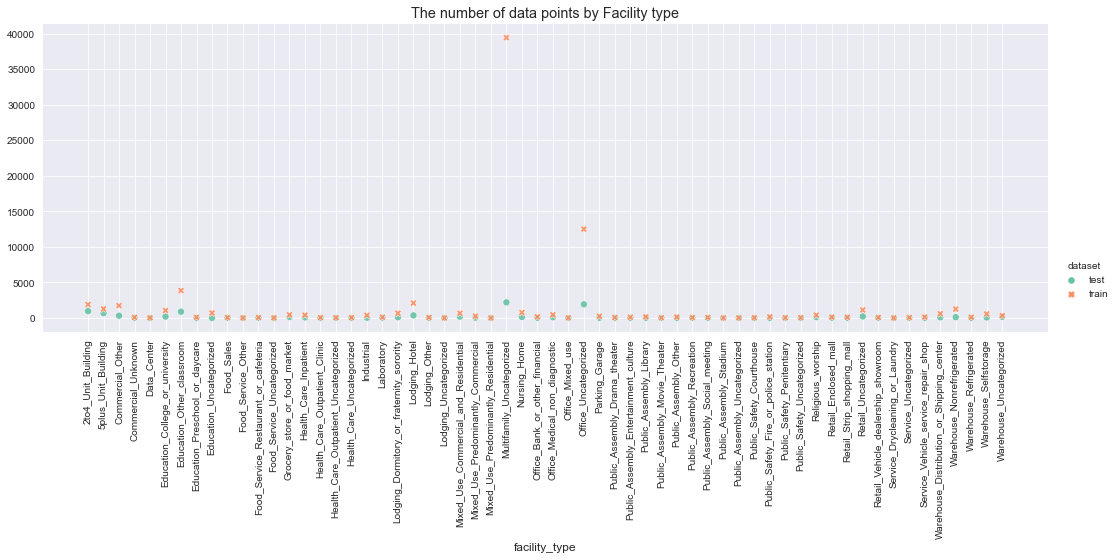

In [25]:
ax = sns.relplot(x='facility_type', 
                 y='id', 
                 data=df_all.groupby(['dataset','facility_type']).agg({'id':'count'}).reset_index(),
                 hue='dataset',
                 style='dataset',
                 aspect=3,
                 height=5,
                 s=50,
                 alpha=0.9
                )\
.set(title = "The number of data points by Facility type",
    ylabel=None)

ax.set_xticklabels(rotation=90) 
None

The oldest building was built in 1600 and the latest in 2016. The majority of the buildings were built since 1900. There were some 0 and null values. Not quite sure what 0 signifies.

In [26]:
df_all['year_built'].value_counts().index.sort_values()

Float64Index([   0.0, 1600.0, 1649.0, 1732.0, 1756.0, 1789.0, 1799.0, 1800.0,
              1811.0, 1815.0,
              ...
              2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0,
              2015.0, 2016.0],
             dtype='float64', length=183)

In [27]:
temp = df_all[['year_built']].fillna(2029)
temp = temp.replace({0:2029})
fig, ax = plt.subplots(figsize=(15,5) )
sns.histplot(temp)
fig.suptitle(f"The year built min: {min(temp['year_built'])}, max: {max(df_all['year_built'])}");

train set buildings have higher floor areas compared to test set buildings and small positive correlation between floor_area and energy_star_rating can be observable.

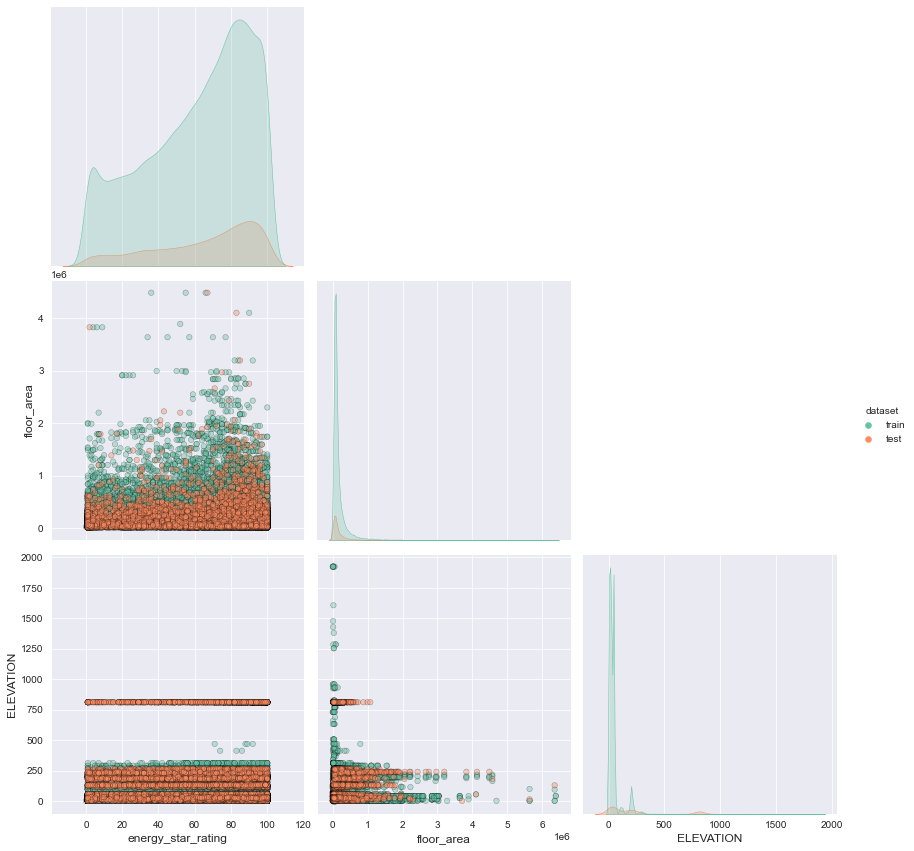

In [28]:
sns.pairplot(df_all,
            vars=['energy_star_rating','floor_area','ELEVATION'], 
            hue='dataset',
            height=4,
            plot_kws = {'alpha': 0.4, 's': 30, 'edgecolor': 'k'},
            corner=True
           );

According to the average temperature (`avg_temp`), if we list states from warmest to coldest: State 1, State 10, State 2, and State 8. The range of temperatures of State1, State 6,  State 11 and State 4 are higher compared to the other states. 

In [29]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(data=df_all[['avg_temp','State_Factor']].drop_duplicates(), y='avg_temp', x='State_Factor');


# any one categorical col (with low unique vals)

Each month has unique temperature values between 31 and 59 which means the values in temperature volumes are highly repeated for the data points.


In [30]:
cols = [['january_min_temp', 'january_avg_temp', 'january_max_temp'],
        ['february_min_temp', 'february_avg_temp', 'february_max_temp'],
        ['march_min_temp', 'march_avg_temp', 'march_max_temp'], 
        ['april_min_temp','april_avg_temp', 'april_max_temp'], 
        ['may_min_temp', 'may_avg_temp','may_max_temp'], 
        ['june_min_temp', 'june_avg_temp', 'june_max_temp'],
        ['july_min_temp', 'july_avg_temp', 'july_max_temp'], 
        ['august_min_temp','august_avg_temp', 'august_max_temp'], 
        ['september_min_temp','september_avg_temp', 'september_max_temp'], 
        ['october_min_temp','october_avg_temp', 'october_max_temp'], 
        ['november_min_temp','november_avg_temp', 'november_max_temp'], 
        ['december_min_temp','december_avg_temp', 'december_max_temp']]
        
fig, ax = plt.subplots(2, 6, figsize=(20,6), sharey=True , sharex=True)
fig.suptitle("Monthly temperature and number of unique values")

for e, c in enumerate(cols):
    if e<=5:
        sns.histplot(df_all[c].drop_duplicates(), ax=ax[0,e], legend=False)\
        .set(title=c[0][:c[0].find('_')]+ '_#'+str(len(df_all[c[0]].unique())))
    else:
        sns.histplot(df_all[c].drop_duplicates(), ax=ax[1,e-6], legend=False)\
        .set(title=c[0][:c[0].find('_')]+ '_#'+str(len(df_all[c[0]].unique())))
        
plt.subplots_adjust(hspace=0.4)

Other weather related numerical columns also have few unique values.

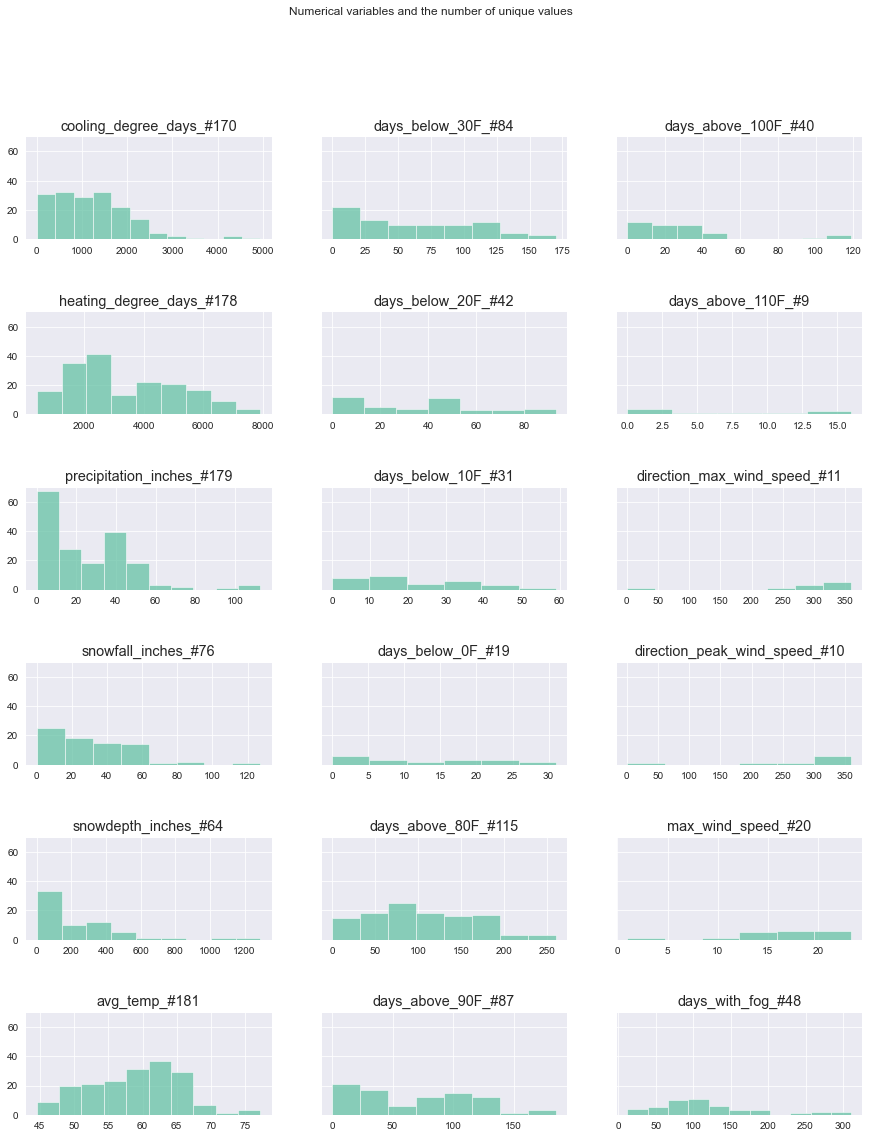

In [31]:
cols=['cooling_degree_days','heating_degree_days', 'precipitation_inches', 'snowfall_inches',
       'snowdepth_inches', 'avg_temp', 'days_below_30F', 'days_below_20F',
       'days_below_10F', 'days_below_0F', 'days_above_80F', 'days_above_90F',
       'days_above_100F', 'days_above_110F', 'direction_max_wind_speed',
       'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog']

fig, ax = plt.subplots(6,3, figsize=(15,18), sharey=True)
fig.suptitle("Numerical variables and the number of unique values")

for e, c in enumerate(cols):
    if e<=5:
        sns.histplot(df_all[c].drop_duplicates(), ax=ax[e,0], legend=False)\
        .set(title=c+"_#"+str(len(df_all[c].unique())), ylabel=None, xlabel=None)
    elif (e>=6) & (e<=11):
        sns.histplot(df_all[c].drop_duplicates(), ax=ax[e-6,1], legend=False)\
        .set(title=c+"_#"+str(len(df_all[c].unique())), ylabel=None, xlabel=None)
    else:
        sns.histplot(df_all[c].drop_duplicates(), ax=ax[e-12,2], legend=False)\
        .set(title=c+"_#"+str(len(df_all[c].unique())), ylabel=None, xlabel=None)
        
plt.subplots_adjust(hspace=0.7)

### Target Variable Exploration (EUI)

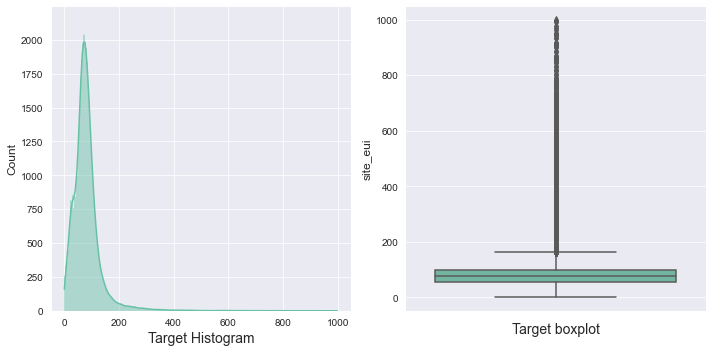

In [32]:
plt.figure(figsize=(10,5))
ax1 = plt.subplot(1,2,1)
cp = sns.histplot(x=df_all['site_eui'], kde=True, palette='Set2')
ax1.set_xlabel('Target Histogram', fontsize=14)
ax2 = plt.subplot(1,2,2)
sns.boxplot(y=df_all['site_eui'], palette='Set2')
ax2.set_xlabel('Target boxplot', fontsize=14)
plt.tight_layout();

State 2 and 4 have slightly higher EUI and State 11 and 8 have lower EUI level.

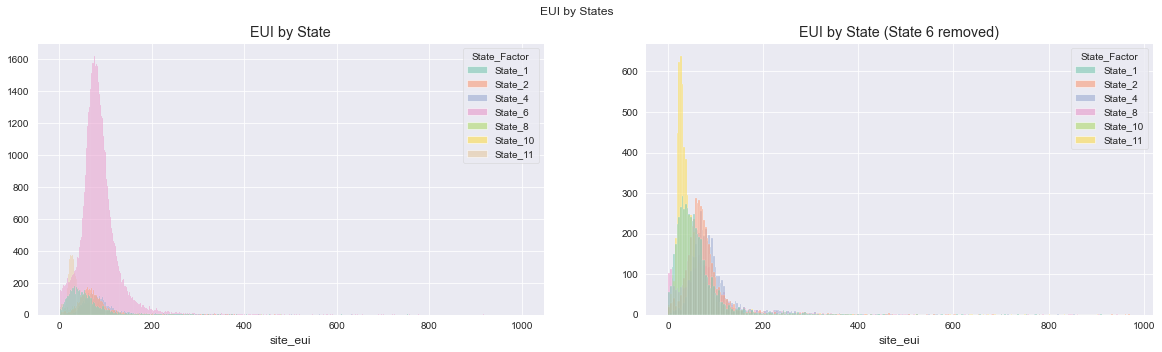

In [33]:
fig, ax = plt.subplots(1,2, figsize=(20,5))
fig.suptitle("EUI by States")

sns.histplot(df_all, x='site_eui',hue='State_Factor', ax=ax[0])\
.set(title='EUI by State', ylabel=None)

sns.histplot(df_all[df_all['State_Factor']!='State_6'], x='site_eui', hue='State_Factor', ax=ax[1])\
.set(title='EUI by State (State 6 removed)', ylabel=None);

In [34]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
fig.suptitle("EUI by State and building class")

sns.violinplot(data=df_all, y='site_eui', x='State_Factor', ax=ax[0])
sns.violinplot(data=df_all, y='site_eui', x='building_class', ax=ax[1]);

Labs and Data Centers have higher EUI compared to the other types of buildings. Grocery stores, Health Care Inpatient, Health Care Uncategorized, Health Care Outpatient, and Food service, restaurants have higher range of EUI. It could be the essential services must operate for longer hours, therefore, have higher EUI.

In [35]:
fig, ax = plt.subplots(figsize=(20,5))
fig.suptitle("EUI by facility type")
ax=sns.boxplot(data=df_all, y='site_eui', x='facility_type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

`floor_area` could have positive relationship with `EUI`. The younger buildings tend to have higher `EUI` which could be because building height and size have increased over the years. It looks like the Higher the `energy_star_rating` is, the lower the `EUI` becomes.

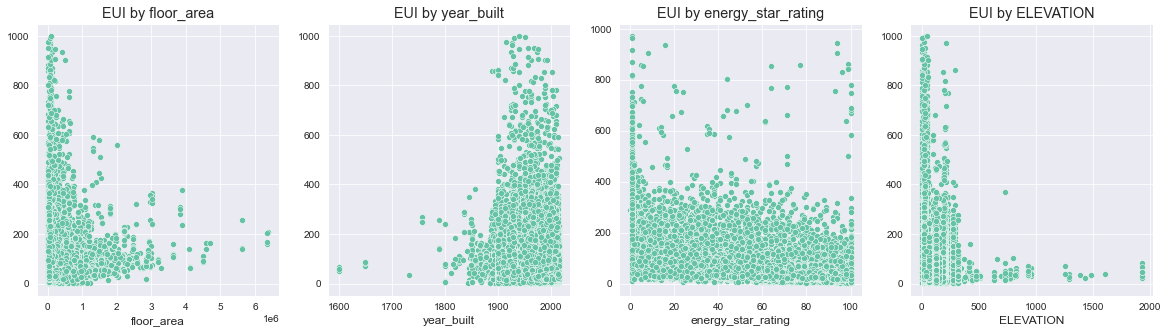

In [36]:
fig, ax = plt.subplots(1,4, figsize=(20,5))

for e, col in enumerate(['floor_area', 'year_built', 'energy_star_rating', 'ELEVATION']):
    if col =='year_built':
        sns.scatterplot(data=df_all[(df_all['year_built']!=0) & (df_all['year_built'].notna())], 
                        x=col, y='site_eui', ax=ax[e]).set(title='EUI by '+ col, ylabel=None)
    else:
        sns.scatterplot(data=df_all, x=col, y='site_eui', ax=ax[e]).set(title='EUI by '+ col, ylabel=None);

The most data points are in lower number of `cooling_degree_days` and higher number of`heating_degree_days`. The majority of the datapoints are also in the lower levels of `snowfall_inches` and `snowdepth_inches`. `direction_max_wind_speed`, `direction_peak_wind_speed`, `max_wind_speed`, and `days_with_fog` columns have the `NA` values of over 50%. No relationship between `EUI` and the weather related numerica columns can be observed from the plot.

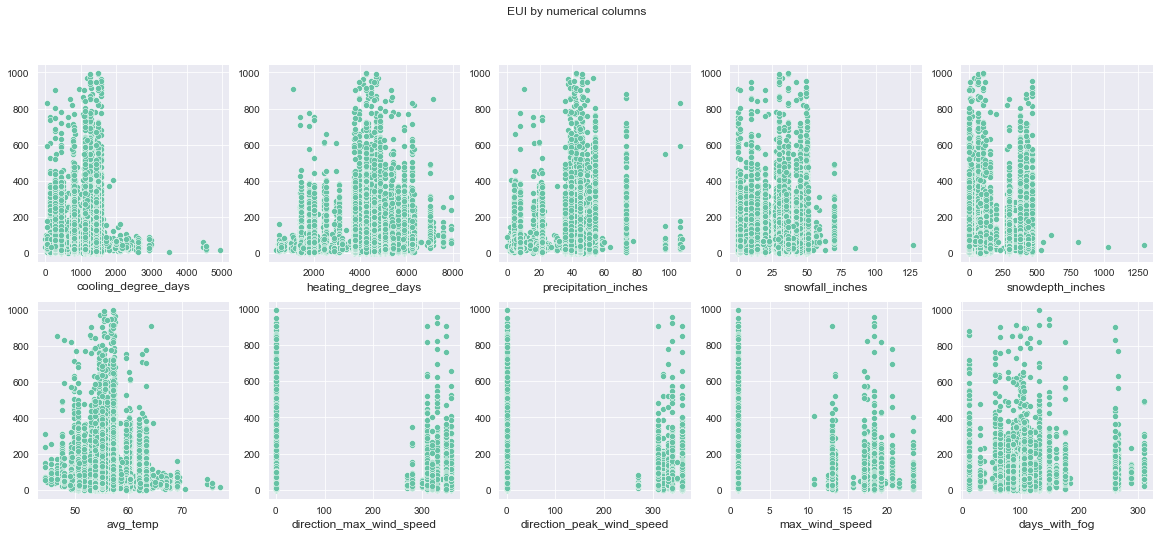

In [37]:
cols=[['cooling_degree_days','heating_degree_days', 'precipitation_inches', 
      'snowfall_inches','snowdepth_inches'], 
      ['avg_temp', 
      'direction_max_wind_speed','direction_peak_wind_speed', 'max_wind_speed', 
      'days_with_fog']]

fig, ax = plt.subplots(2,5, figsize=(20,8))
fig.suptitle('EUI by numerical columns')

for e1, l in enumerate(cols):
    for e2, col in enumerate(l):
        sns.scatterplot(data=df_all, 
                        x=col, y='site_eui', ax=ax[e1, e2]).set(ylabel=None);

### Observations

- Categorical variables such as `State_Factor`, `building_class` and `facility_type` might have some correlation with `EUI`.
- `State_6` is not present in `test` set. State 6 removed training data should be tested.
- `floor_area`, `energe_star_rating` should be included in the modelling to be tested.
- From the plots, it's difficult to observe direct (linear) relationship between `EUI` and weather related variables. However, this doesn't deny non-linear relationships among the variables.
- Variables with more than 50% `NA` values should not be imputed (in my opinion) and better to be not included in the training set.
- Weather variables have few unique values repeated throughout the datapoints. Not sure how this duplicated values might affect the modeling and prediction.

# Preprocessing

we will suppose that two  if two buildings have the same values for these features;   
they are the same building, in other words groupby_cols = (building_id)


Removing duplicates by clubbing similar building data

In [38]:
df_all

Year_Factor State_Factor building_class  \
0                1      State_1     Commercial   
1                1      State_1     Commercial   
2                1      State_1     Commercial   
3                1      State_1     Commercial   
4                1      State_1     Commercial   
...            ...          ...            ...   
85457            7     State_11    Residential   
85458            7     State_11    Residential   
85459            7     State_11    Residential   
85460            7     State_11    Residential   
85461            7     State_11    Residential   

                                   facility_type  floor_area  year_built  \
0                   Grocery_store_or_food_market     61242.0      1942.0   
1      Warehouse_Distribution_or_Shipping_center    274000.0      1955.0   
2                           Retail_Enclosed_mall    280025.0      1951.0   
3                      Education_Other_classroom     55325.0      1980.0   
4                      Warehouse_Nonrefrigerated     66000.0      1985.0   
...                                          ...         ...         ...   
85457                        5plus_Unit_Building    305925.0      2013.0   
85458                        5plus_Unit_Building     34909.0      1910.0   
85459                        5plus_Unit_Building     42393.0      2014.0   
85460                        5plus_Unit_Building     25368.0      1992.0   
85461                        5plus_Unit_Building     45640.0      1994.0   

       energy_star_rating  ELEVATION  january_min_temp  january_avg_temp  \
0                    11.0        2.4                36          50.50000   
1                    45.0        1.8                36          50.50000   
2                    97.0        1.8                36          50.50000   
3                    46.0        1.8                36          50.50000   
4                   100.0        2.4                36          50.50000   
...                   ...        ...               ...               ...   
85457                99.0      812.0                21          38.66129   
85458                94.0       26.5                21          38.66129   
85459                94.0      812.0                21          38.66129   
85460                79.0      812.0                21          38.66129   
85461                87.0       26.5                21          38.66129   

       january_max_temp  february_min_temp  february_avg_temp  \
0                    68                 35          50.589286   
1                    68                 35          50.589286   
2                    68                 35          50.589286   
3                    68                 35          50.589286   
4                    68                 35          50.589286   
...                 ...                ...                ...   
85457                54                 28          41.625000   
85458                54                 28          41.625000   
85459                54                 28          41.625000   
85460                54                 28          41.625000   
85461                54                 28          41.625000   

       february_max_temp  march_min_temp  march_avg_temp  march_max_temp  \
0                     73              40       53.693548              80   
1                     73              40       53.693548              80   
2                     73              40       53.693548              80   
3                     73              40       53.693548              80   
4                     73              40       53.693548              80   
...                  ...             ...             ...             ...   
85457                 59              33       46.500000              59   
85458                 59              33       46.500000              59   
85459                 59              33       46.500000              59   
85460                 59              3

In [39]:
groupby_cols = ['State_Factor','building_class','facility_type','floor_area','year_built']
df_all = df_all.sort_values(by=groupby_cols+['Year_Factor']).reset_index(drop=True)

df_all = remove_null_col_threshold(df_all , 40)

NULL data from each column     (out of 100%)

Year_Factor                   0.000000
State_Factor                  0.000000
building_class                0.000000
facility_type                 0.000000
floor_area                    0.000000
year_built                    2.257144
energy_star_rating           33.889916
ELEVATION                     0.000000
january_min_temp              0.000000
january_avg_temp              0.000000
january_max_temp              0.000000
february_min_temp             0.000000
february_avg_temp             0.000000
february_max_temp             0.000000
march_min_temp                0.000000
march_avg_temp                0.000000
march_max_temp                0.000000
april_min_temp                0.000000
april_avg_temp                0.000000
april_max_temp                0.000000
may_min_temp                  0.000000
may_avg_temp                  0.000000
may_max_temp                  0.000000
june_min_temp                 0.000000
june_avg_temp     

In [40]:
#Imputing rest of the values with -999

df_all['energy_star_rating'] = df_all['energy_star_rating'].replace(0, np.nan)
df_all['year_built'] = df_all['year_built'].replace(0, np.nan)
df_all['energy_star_rating'] = df_all['energy_star_rating'].replace(np.nan,-999)
df_all['year_built'] = df_all['year_built'].replace(np.nan,-999)
df_all

# NO NULL Values remain

Year_Factor State_Factor building_class              facility_type  \
0                3      State_1     Commercial           Commercial_Other   
1                4      State_1     Commercial           Commercial_Other   
2                5      State_1     Commercial           Commercial_Other   
3                7      State_1     Commercial           Commercial_Other   
4                3      State_1     Commercial           Commercial_Other   
...            ...          ...            ...                        ...   
85457            7      State_8    Residential  Multifamily_Uncategorized   
85458            6      State_8    Residential  Multifamily_Uncategorized   
85459            7      State_8    Residential  Multifamily_Uncategorized   
85460            6      State_8    Residential  Multifamily_Uncategorized   
85461            7      State_8    Residential  Multifamily_Uncategorized   

       floor_area  year_built  energy_star_rating  ELEVATION  \
0         10149.0      1931.0              -999.0       45.7   
1         10149.0      1931.0              -999.0      120.4   
2         10149.0      1931.0              -999.0       59.1   
3         10149.0      1931.0              -999.0       59.1   
4         10755.0      1937.0              -999.0        9.1   
...           ...         ...                 ...        ...   
85457    900000.0      1960.0                90.0      130.8   
85458   1179072.0      1959.0                96.0        3.0   
85459   1179072.0      1959.0                92.0      130.8   
85460   1195034.0      1964.0                75.0        3.0   
85461   1195034.0      1964.0                77.0      130.8   

       january_min_temp  january_avg_temp  january_max_temp  \
0                    26         44.516129                64   
1                    41         55.096774                73   
2                    29         51.387097                77   
3                    38         50.596774                64   
4                    22         44.790323                65   
...                 ...               ...               ...   
85457                 2         33.435484                61   
85458                 8         29.827586                62   
85459                 2         33.435484                61   
85460                 8         29.827586                62   
85461                 2         33.435484                61   

       february_min_temp  february_avg_temp  february_max_temp  \
0                     30          49.392857                 69   
1                     42          54.875000                 71   
2                     36          56.803571                 75   
3                     40          54.482143                 66   
4                     25          47.892857                 71   
...                  ...                ...                ...   
85457                 16          37.660714                 73   
85458                  4          33.896552                 62   
85459                 16          37.660714                 73   
85460                  4          33.896552                 62   
85461                 16          37.660714                 73   

       march_min_temp  march_avg_temp  march_max_temp  april_min_temp  \
0                  37       55.967742              77              40   
1                  47       59.032258              76              47   
2                  40       61.435484              85              41   
3                  42       56.935484              77              45   
4                  32       53.112903              79              34   
...               ...             ...             ...             ...   
85457               8       35.935484              69              28   
85458              24       45.967742              79              18   
85459               8       35.935484              69              28   
85460              24       45.96

In [41]:
df_all.shape  # 4 colums are dropped

(85462, 61)

#### All the null values are removed only "site_eui" from test dataset remains

In [42]:
df_all.head()

Year_Factor State_Factor building_class     facility_type  floor_area  \
0            3      State_1     Commercial  Commercial_Other     10149.0   
1            4      State_1     Commercial  Commercial_Other     10149.0   
2            5      State_1     Commercial  Commercial_Other     10149.0   
3            7      State_1     Commercial  Commercial_Other     10149.0   
4            3      State_1     Commercial  Commercial_Other     10755.0   

   year_built  energy_star_rating  ELEVATION  january_min_temp  \
0      1931.0              -999.0       45.7                26   
1      1931.0              -999.0      120.4                41   
2      1931.0              -999.0       59.1                29   
3      1931.0              -999.0       59.1                38   
4      1937.0              -999.0        9.1                22   

   january_avg_temp  january_max_temp  february_min_temp  february_avg_temp  \
0         44.516129                64                 30          49.392857   
1         55.096774                73                 42          54.875000   
2         51.387097                77                 36          56.803571   
3         50.596774                64                 40          54.482143   
4         44.790323                65                 25          47.892857   

   february_max_temp  march_min_temp  march_avg_temp  march_max_temp  \
0                 69              37       55.967742              77   
1                 71              47       59.032258              76   
2                 75              40       61.435484              85   
3                 66              42       56.935484              77   
4                 71              32       53.112903              79   

   april_min_temp  april_avg_temp  april_max_temp  may_min_temp  may_avg_temp  \
0              40       61.783333              90            45     65.129032   
1              47       60.100000              90            51     63.483871   
2              41       60.966667              91            45     62.887097   
3              45       58.450000              78            49     60.903226   
4              34       58.866667              87            35     62.096774   

   may_max_temp  june_min_temp  june_avg_temp  june_max_temp  july_min_temp  \
0            91             52      70.016667            104             52   
1            92             52      64.250000             87             53   
2            90             55      72.983333            106             60   
3            87             51      63.150000             97             53   
4            91             44      66.283333             99             48   

   july_avg_temp  july_max_temp  august_min_temp  august_avg_temp  \
0      71.387097            102               54        71.322581   
1      66.903226             90               57        67.016129   
2      74.516129            103               58        74.774194   
3      64.258065             85               53        65.854839   
4      65.693548             91               45        67.080645   

   august_max_temp  september_min_temp  september_avg_temp  \
0               97                  47           69.133333   
1               80                  56           68.383333   
2              104                  53           73.583333   
3               88                  54           69.766667   
4               92                  42           65.950000   

   september_max_temp  october_min_temp  october_avg_temp  october_max_temp  \
0                  98                43         61.000000                84   
1                  83                55         68.661290                95   
2                 105                49         69.580645                96   
3                 104                48         64.193548                91   
4                  96                35         56.967742                85   

   november_min_

## Encoding and Scaling

**Target encoding** for categorical columns.  
Target encoding is the process of replacing a categorical value with the mean of the target variable. Any non-categorical columns are automatically dropped by the target encoder model.

Note: You can also use target encoding to convert categorical columns to numeric. 

> “features are replaced with a blend of posterior probability of the target given particular categorical value and the prior probability of the target over all the training data.”

[Target Encoding Vs. One-hot Encoding with Simple Examples](https://medium.com/analytics-vidhya/target-encoding-vs-one-hot-encoding-with-simple-examples-276a7e7b3e64)


In [43]:
target='site_eui'
cats = ['State_Factor', 'building_class', 'facility_type']
for col in cats:
    encoder = TargetEncoder()
    df_all[f'te_{col}'] = encoder.fit_transform(df_all[col], df_all[target])
    


In [44]:
df_all

Year_Factor State_Factor building_class              facility_type  \
0                3      State_1     Commercial           Commercial_Other   
1                4      State_1     Commercial           Commercial_Other   
2                5      State_1     Commercial           Commercial_Other   
3                7      State_1     Commercial           Commercial_Other   
4                3      State_1     Commercial           Commercial_Other   
...            ...          ...            ...                        ...   
85457            7      State_8    Residential  Multifamily_Uncategorized   
85458            6      State_8    Residential  Multifamily_Uncategorized   
85459            7      State_8    Residential  Multifamily_Uncategorized   
85460            6      State_8    Residential  Multifamily_Uncategorized   
85461            7      State_8    Residential  Multifamily_Uncategorized   

       floor_area  year_built  energy_star_rating  ELEVATION  \
0         10149.0      1931.0              -999.0       45.7   
1         10149.0      1931.0              -999.0      120.4   
2         10149.0      1931.0              -999.0       59.1   
3         10149.0      1931.0              -999.0       59.1   
4         10755.0      1937.0              -999.0        9.1   
...           ...         ...                 ...        ...   
85457    900000.0      1960.0                90.0      130.8   
85458   1179072.0      1959.0                96.0        3.0   
85459   1179072.0      1959.0                92.0      130.8   
85460   1195034.0      1964.0                75.0        3.0   
85461   1195034.0      1964.0                77.0      130.8   

       january_min_temp  january_avg_temp  january_max_temp  \
0                    26         44.516129                64   
1                    41         55.096774                73   
2                    29         51.387097                77   
3                    38         50.596774                64   
4                    22         44.790323                65   
...                 ...               ...               ...   
85457                 2         33.435484                61   
85458                 8         29.827586                62   
85459                 2         33.435484                61   
85460                 8         29.827586                62   
85461                 2         33.435484                61   

       february_min_temp  february_avg_temp  february_max_temp  \
0                     30          49.392857                 69   
1                     42          54.875000                 71   
2                     36          56.803571                 75   
3                     40          54.482143                 66   
4                     25          47.892857                 71   
...                  ...                ...                ...   
85457                 16          37.660714                 73   
85458                  4          33.896552                 62   
85459                 16          37.660714                 73   
85460                  4          33.896552                 62   
85461                 16          37.660714                 73   

       march_min_temp  march_avg_temp  march_max_temp  april_min_temp  \
0                  37       55.967742              77              40   
1                  47       59.032258              76              47   
2                  40       61.435484              85              41   
3                  42       56.935484              77              45   
4                  32       53.112903              79              34   
...               ...             ...             ...             ...   
85457               8       35.935484              69              28   
85458              24       45.967742              79              18   
85459               8       35.935484              69              28   
85460              24       45.96

#### Floor Area varies from 943 to 6385382 hence decided to use the Log Transformation.

Max :  6385382.0
Min :  943.0


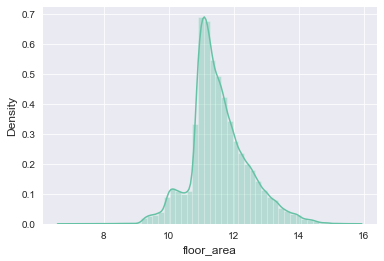

In [45]:

print('Max : ',df_all.floor_area.max())
print('Min : ', df_all.floor_area.min())
#sns.distplot(df.floor_area)
sns.distplot(np.log(df_all.floor_area) ,label = "Log('FloorArea')")

df_all.floor_area = np.log(df_all.floor_area)

In [46]:
df_all.drop(labels=cats , inplace=True , axis=1)

# PCA

##  Checking Corrrelation

<AxesSubplot:>

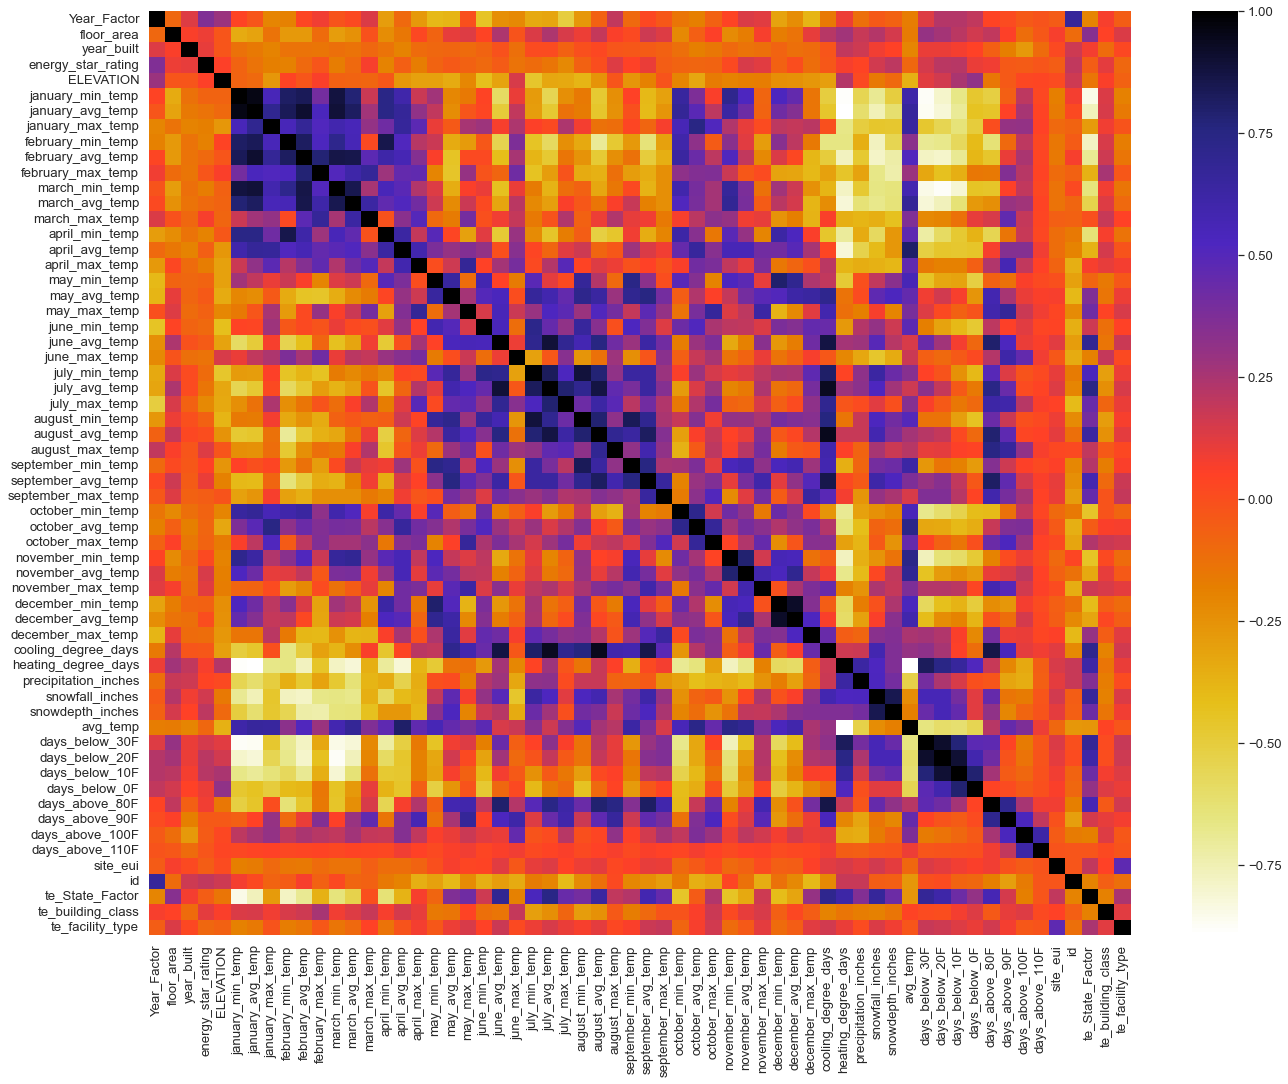

In [47]:
plt.figure(figsize=(22,17))
sns.set(font_scale=1.2)
sns.heatmap(df_all.corr(), annot=False, cmap=plt.cm.CMRmap_r)

Dropping all the Components with "min_Temp" and ""max_Temp"" in it as those are all redundant information keeping the "Avg_Temp" column

In [48]:
df_all = df_all[df_all.columns.drop(list(df_all.filter(regex='min_temp')))]
df_all = df_all[df_all.columns.drop(list(df_all.filter(regex='max_temp')))]

pd.set_option("display.max_rows", 100)
print(df_all.drop(columns=['id' ,'site_eui' , 'dataset']).max()-df_all.drop(columns=['id','site_eui', 'dataset']).min())
# pd.set_option("display.max_rows", None )


Year_Factor                6.000000
floor_area                 8.820456
year_built              3015.000000
energy_star_rating      1099.000000
ELEVATION               1930.900000
january_avg_temp          53.951613
february_avg_temp         51.857143
march_avg_temp            43.903226
april_avg_temp            34.220000
may_avg_temp              35.162903
june_avg_temp             35.450000
july_avg_temp             39.612903
august_avg_temp           38.209677
september_avg_temp        36.516667
october_avg_temp          36.048387
november_avg_temp         36.650000
december_avg_temp         38.000000
cooling_degree_days     4948.000000
heating_degree_days     7531.000000
precipitation_inches     112.920000
snowfall_inches          127.300000
snowdepth_inches        1292.000000
avg_temp                  32.732877
days_below_30F           170.000000
days_below_20F            93.000000
days_below_10F            59.000000
days_below_0F             31.000000
days_above_80F           260

In [49]:
df_all.shape

(85462, 37)

In [50]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85462 entries, 0 to 85461
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year_Factor           85462 non-null  int64  
 1   floor_area            85462 non-null  float64
 2   year_built            85462 non-null  float64
 3   energy_star_rating    85462 non-null  float64
 4   ELEVATION             85462 non-null  float64
 5   january_avg_temp      85462 non-null  float64
 6   february_avg_temp     85462 non-null  float64
 7   march_avg_temp        85462 non-null  float64
 8   april_avg_temp        85462 non-null  float64
 9   may_avg_temp          85462 non-null  float64
 10  june_avg_temp         85462 non-null  float64
 11  july_avg_temp         85462 non-null  float64
 12  august_avg_temp       85462 non-null  float64
 13  september_avg_temp    85462 non-null  float64
 14  october_avg_temp      85462 non-null  float64
 15  november_avg_temp  

<AxesSubplot:>

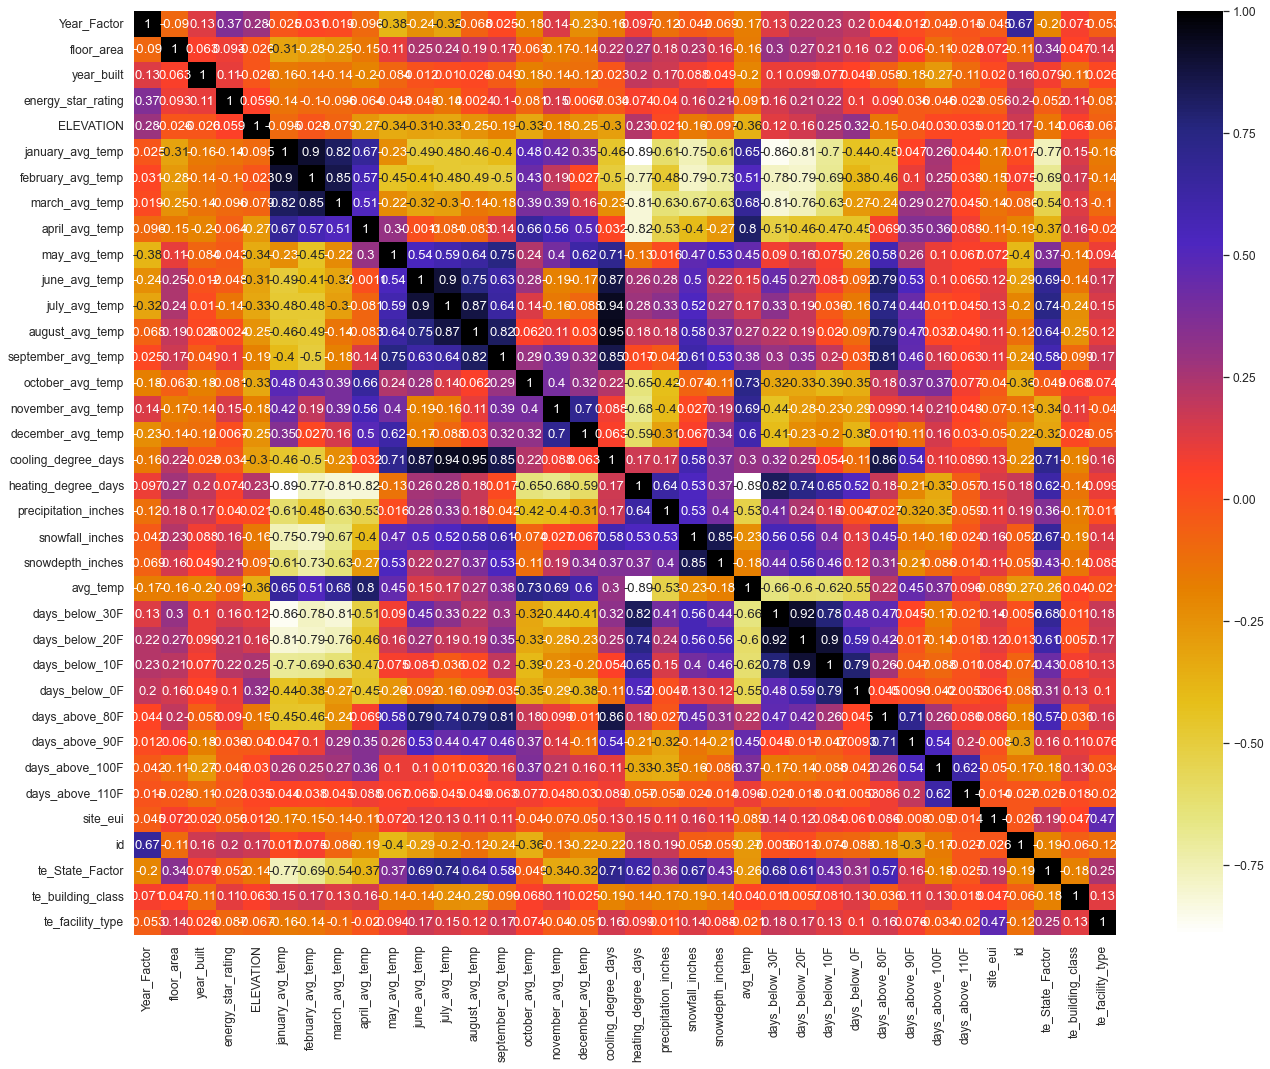

In [51]:
plt.figure(figsize=(22,17))
sns.set(font_scale=1.1)
sns.heatmap(df_all.corr(), annot=True, cmap=plt.cm.CMRmap_r)

### From above heatmap we found  [ days_below_30F , days_below_20F , days_below_10F] are very correlated
#### Removing the Correlated Col : **days_below_20F**

In [52]:
df_all = df_all.drop(columns='days_below_20F')

<AxesSubplot:>

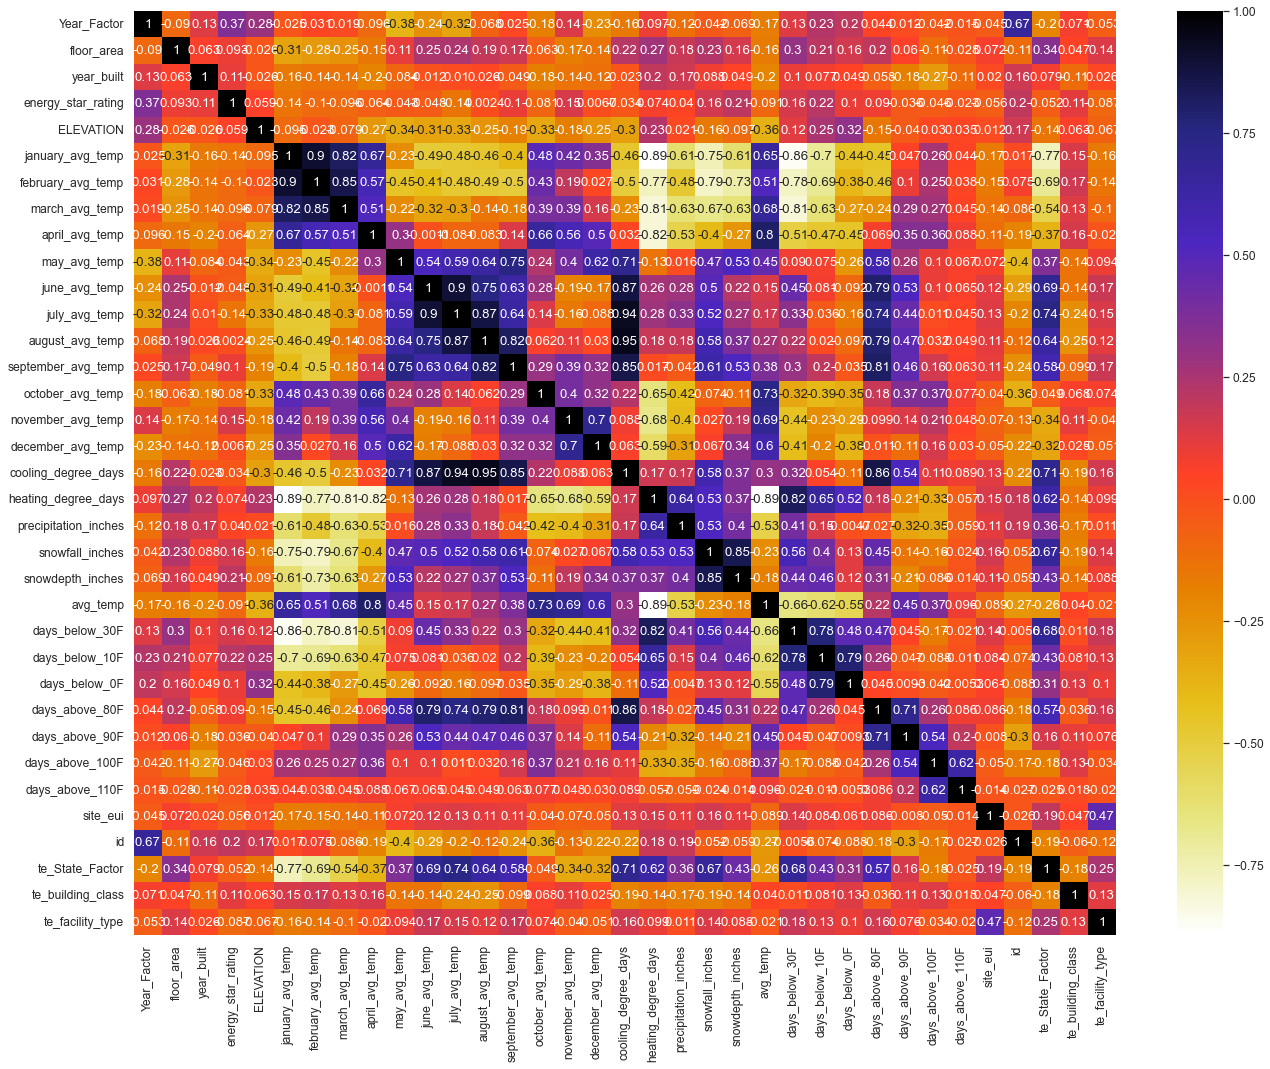

In [53]:
plt.figure(figsize=(22,17))
sns.set(font_scale=1.1)
sns.heatmap(df_all.corr(), annot=True, cmap=plt.cm.CMRmap_r)

### Checking target variable transformation

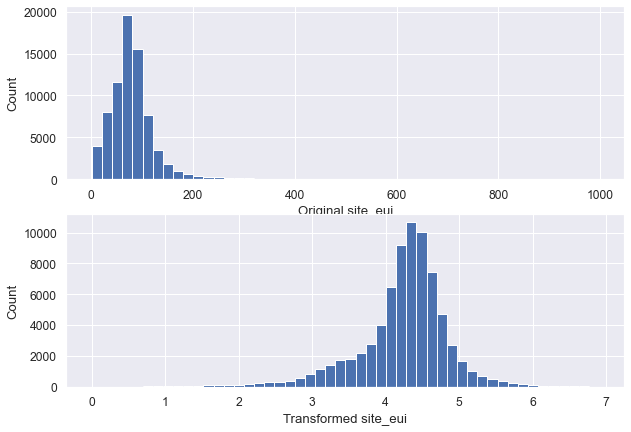

In [54]:
target = 'site_eui'
plt.figure(figsize=(10,7))
# plot the original variable vs sale price    
plt.subplot(2, 1, 1)
train[target].hist(bins=50)
plt.ylabel('Count')
plt.xlabel('Original ' + target)

# plot transformed variable vs sale price
plt.subplot(2, 1, 2)
np.log(train[target]).hist(bins=50)
plt.ylabel('Count')
plt.xlabel('Transformed ' + target);

In [55]:
df_all.columns

Index(['Year_Factor', 'floor_area', 'year_built', 'energy_star_rating',
       'ELEVATION', 'january_avg_temp', 'february_avg_temp', 'march_avg_temp',
       'april_avg_temp', 'may_avg_temp', 'june_avg_temp', 'july_avg_temp',
       'august_avg_temp', 'september_avg_temp', 'october_avg_temp',
       'november_avg_temp', 'december_avg_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inches',
       'snowdepth_inches', 'avg_temp', 'days_below_30F', 'days_below_10F',
       'days_below_0F', 'days_above_80F', 'days_above_90F', 'days_above_100F',
       'days_above_110F', 'site_eui', 'id', 'dataset', 'te_State_Factor',
       'te_building_class', 'te_facility_type'],
      dtype='object')

In [56]:
df_all.head()

Year_Factor  floor_area  year_built  energy_star_rating  ELEVATION  \
0            3    9.225130      1931.0              -999.0       45.7   
1            4    9.225130      1931.0              -999.0      120.4   
2            5    9.225130      1931.0              -999.0       59.1   
3            7    9.225130      1931.0              -999.0       59.1   
4            3    9.283126      1937.0              -999.0        9.1   

   january_avg_temp  february_avg_temp  march_avg_temp  april_avg_temp  \
0         44.516129          49.392857       55.967742       61.783333   
1         55.096774          54.875000       59.032258       60.100000   
2         51.387097          56.803571       61.435484       60.966667   
3         50.596774          54.482143       56.935484       58.450000   
4         44.790323          47.892857       53.112903       58.866667   

   may_avg_temp  june_avg_temp  july_avg_temp  august_avg_temp  \
0     65.129032      70.016667      71.387097        71.322581   
1     63.483871      64.250000      66.903226        67.016129   
2     62.887097      72.983333      74.516129        74.774194   
3     60.903226      63.150000      64.258065        65.854839   
4     62.096774      66.283333      65.693548        67.080645   

   september_avg_temp  october_avg_temp  november_avg_temp  december_avg_temp  \
0           69.133333         61.000000          55.116667          45.387097   
1           68.383333         68.661290          59.650000          56.790323   
2           73.583333         69.580645          52.866667          48.580645   
3           69.766667         64.193548          58.050000          51.887097   
4           65.950000         56.967742          52.516667          43.338710   

   cooling_degree_days  heating_degree_days  precipitation_inches  \
0                  826                 2542                  4.50   
1                  497                 1477                 20.69   
2                 1319                 1823                  7.95   
3                  342                 2112                 25.24   
4                  303                 3108                  4.16   

   snowfall_inches  snowdepth_inches   avg_temp  days_below_30F  \
0              0.0                 0  60.056164              20   
1              0.0                 0  62.067123               0   
2              0.0                 0  63.398630               4   
3              0.0                 0  59.894521               0   
4              0.0                 0  57.082192              33   

   days_below_10F  days_below_0F  days_above_80F  days_above_90F  \
0               0              0             111              31   
1               0              0              27               6   
2               0              0             136              52   
3               0              0              29               5   
4               0              0              72              10   

   days_above_100F  days_above_110F   site_eui     id dataset  \
0                5                0   6.800000   1456   train   
1                0                0   8.200000   2673   train   
2               10                0  12.300000   3769   train   
3                2                0        NaN  76077    test   
4                0                0  63.083288   2144   train   

   te_State_Factor  te_building_class  te_facility_type  
0        62.196194          85.755239         92.642037  
1        62.196194          85.755239         92.642037  
2        62.196194          85.755239         92.642037  
3        62.196194          85.755239         92.642037  
4        62.196194          85.755239         92.642037

In [57]:
df_all.shape

(85462, 36)

In [58]:
train = df_all[df_all['dataset']=='train']
test = df_all[df_all['dataset']=='test']

train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

test_ids = test['id']
train_ids = train['id']

target = train['site_eui'] #y_train

train = train.drop(['id', 'dataset', 'site_eui'], axis=1) #X_train
test = test.drop(['id', 'dataset', 'site_eui'], axis=1) #X_test

In [59]:
train

Year_Factor  floor_area  year_built  energy_star_rating  ELEVATION  \
0                3    9.225130      1931.0              -999.0       45.7   
1                4    9.225130      1931.0              -999.0      120.4   
2                5    9.225130      1931.0              -999.0       59.1   
3                3    9.283126      1937.0              -999.0        9.1   
4                4    9.283126      1937.0              -999.0        9.1   
...            ...         ...         ...                 ...        ...   
75752            6   13.584909      1962.0                88.0       18.3   
75753            6   13.618450      1963.0                84.0       21.3   
75754            6   13.685602      2005.0               100.0        3.0   
75755            6   13.980238      1959.0                96.0        3.0   
75756            6   13.993685      1964.0                75.0        3.0   

       january_avg_temp  february_avg_temp  march_avg_temp  april_avg_temp  \
0             44.516129          49.392857       55.967742       61.783333   
1             55.096774          54.875000       59.032258       60.100000   
2             51.387097          56.803571       61.435484       60.966667   
3             44.790323          47.892857       53.112903       58.866667   
4             55.096774          54.875000       59.032258       60.100000   
...                 ...                ...             ...             ...   
75752         29.709677          34.051724       46.467742       50.166667   
75753         29.709677          34.051724       46.467742       50.166667   
75754         29.827586          33.896552       45.967742       49.931034   
75755         29.827586          33.896552       45.967742       49.931034   
75756         29.827586          33.896552       45.967742       49.931034   

       may_avg_temp  june_avg_temp  july_avg_temp  august_avg_temp  \
0         65.129032      70.016667      71.387097        71.322581   
1         63.483871      64.250000      66.903226        67.016129   
2         62.887097      72.983333      74.516129        74.774194   
3         62.096774      66.283333      65.693548        67.080645   
4         63.483871      64.250000      66.903226        67.016129   
...             ...            ...            ...              ...   
75752     59.403226      70.433333      76.500000        76.080645   
75753     59.403226      70.433333      76.500000        76.080645   
75754     59.161290      70.465517      77.083333        75.725806   
75755     59.161290      70.465517      77.083333        75.725806   
75756     59.161290      70.465517      77.083333        75.725806   

       september_avg_temp  october_avg_temp  november_avg_temp  \
0               69.133333         61.000000          55.116667   
1               68.383333         68.661290          59.650000   
2               73.583333         69.580645          52.866667   
3               65.950000         56.967742          52.516667   
4               68.383333         68.661290          59.650000   
...                   ...               ...                ...   
75752           69.150000         56.258065          46.350000   
75753           69.150000         56.258065          46.350000   
75754           68.200000         55.258065          44.316667   
75755           68.200000         55.258065          44.316667   
75756           68.200000         55.258065          44.316667   

       december_avg_temp  cooling_degree_days  heating_degree_days  \
0              45.387097                  826                 2542   
1              56.790323                  497                 1477   
2              48.580645                 1319                 1823   
3              43.338710                  303                 3108   
4              56.790323                  497                 1477   
...                  ...                  ...                  ...   
75752          35.500

In [60]:
test

Year_Factor  floor_area  year_built  energy_star_rating  ELEVATION  \
0               7    9.225130      1931.0              -999.0       59.1   
1               7    9.283126      1937.0              -999.0       18.6   
2               7    9.369905      1937.0              -999.0        2.4   
3               7    9.472705      1946.0              -999.0       59.1   
4               7    9.487972      1907.0              -999.0       43.9   
...           ...         ...         ...                 ...        ...   
9700            7   13.655342      2009.0                59.0      130.8   
9701            7   13.685602      2005.0               100.0        3.0   
9702            7   13.710150      1960.0                90.0      130.8   
9703            7   13.980238      1959.0                92.0      130.8   
9704            7   13.993685      1964.0                77.0      130.8   

      january_avg_temp  february_avg_temp  march_avg_temp  april_avg_temp  \
0            50.596774          54.482143       56.935484           58.45   
1            50.596774          54.482143       56.935484           58.45   
2            50.596774          54.482143       56.935484           58.45   
3            50.596774          54.482143       56.935484           58.45   
4            50.596774          54.482143       56.935484           58.45   
...                ...                ...             ...             ...   
9700         33.435484          37.660714       35.935484           54.80   
9701         33.435484          37.660714       35.935484           54.80   
9702         33.435484          37.660714       35.935484           54.80   
9703         33.435484          37.660714       35.935484           54.80   
9704         33.435484          37.660714       35.935484           54.80   

      may_avg_temp  june_avg_temp  july_avg_temp  august_avg_temp  \
0        60.903226      63.150000      64.258065        65.854839   
1        60.903226      63.150000      64.258065        65.854839   
2        60.903226      63.150000      64.258065        65.854839   
3        60.903226      63.150000      64.258065        65.854839   
4        60.903226      63.150000      64.258065        65.854839   
...            ...            ...            ...              ...   
9700     59.096774      68.689655      74.677419        70.564516   
9701     59.096774      68.689655      74.677419        70.564516   
9702     59.096774      68.689655      74.677419        70.564516   
9703     59.096774      68.689655      74.677419        70.564516   
9704     59.096774      68.689655      74.677419        70.564516   

      september_avg_temp  october_avg_temp  november_avg_temp  \
0              69.766667         64.193548          58.050000   
1              69.766667         64.193548          58.050000   
2              69.766667         64.193548          58.050000   
3              69.766667         64.193548          58.050000   
4              69.766667         64.193548          58.050000   
...                  ...               ...                ...   
9700           66.250000         58.129032          41.583333   
9701           66.250000         58.129032          41.583333   
9702           66.250000         58.129032          41.583333   
9703           66.250000         58.129032          41.583333   
9704           66.250000         58.129032          41.583333   

      december_avg_temp  cooling_degree_days  heating_degree_days  \
0             51.887097                  342                 2112   
1             51.887097                  342                 2112   
2             51.887097                  342                 2112   
3             51.887097                  342                 2112   
4             51.887097                  342                 2112   
...                 ...                  ...                  ...   
9700          29.933333                  866                 5264   
9701  

In [61]:
target

0         6.800000
1         8.200000
2        12.300000
3        63.083288
4        56.992329
           ...    
75752    46.082082
75753    57.989591
75754    17.881351
75755    43.533097
75756    59.196394
Name: site_eui, Length: 75757, dtype: float64

In [62]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85462 entries, 0 to 85461
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year_Factor           85462 non-null  int64  
 1   floor_area            85462 non-null  float64
 2   year_built            85462 non-null  float64
 3   energy_star_rating    85462 non-null  float64
 4   ELEVATION             85462 non-null  float64
 5   january_avg_temp      85462 non-null  float64
 6   february_avg_temp     85462 non-null  float64
 7   march_avg_temp        85462 non-null  float64
 8   april_avg_temp        85462 non-null  float64
 9   may_avg_temp          85462 non-null  float64
 10  june_avg_temp         85462 non-null  float64
 11  july_avg_temp         85462 non-null  float64
 12  august_avg_temp       85462 non-null  float64
 13  september_avg_temp    85462 non-null  float64
 14  october_avg_temp      85462 non-null  float64
 15  november_avg_temp  

In [63]:
y_test = pd.read_csv('y_test.csv')

X_train = train
X_test = test
y_train = target
y_test = y_test['site_eui']
print('Train: ', X_train.shape)
print('Test:', X_test.shape)
print('Samples: ', y_train.shape)
print('Targets: ', y_test.shape)

Train:  (75757, 33)
Test: (9705, 33)
Samples:  (75757,)
Targets:  (9705,)


In [64]:
X_train = X_train[X_train.columns.drop(list(X_train.filter(regex='temp')))]
X_test = X_test[X_test.columns.drop(list(X_test.filter(regex='temp')))]

print('Train: ', X_train.shape)
print('Test:', X_test.shape)
print('Samples: ', y_train.shape)
print('Targets: ', y_test.shape)



Train:  (75757, 20)
Test: (9705, 20)
Samples:  (75757,)
Targets:  (9705,)


### Saving feature dataset

In [65]:
saved = False
if saved:
    !pip install pickle5 --quiet
    import pickle5 as pickle
    data_path = './feature_transformed_set.pkl'
    with open(data_path, "rb") as fh:
        df_all = pickle.load(fh)
else:
    df_all.to_pickle('./feature_transformed_set.pkl')

In [66]:

# # y1 = df['site_eui']

# # X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)
# print('X_train.shape:\t{0}\nX_test.shape:\t{1}\ny_train.shape:\t{2}\ny_test.shape:\t{3}'.format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))


# from lazypredict.Supervised import LazyRegressor, LazyClassifier
# # LazyClassifier Instance and fiting data
# reg= LazyRegressor(ignore_warnings=False, custom_metric=None ,verbose=1)
# models, predictions = reg.fit(X_train, X_test, y_train, y_test)

### Used Lazy Regressor to find the best Regressors

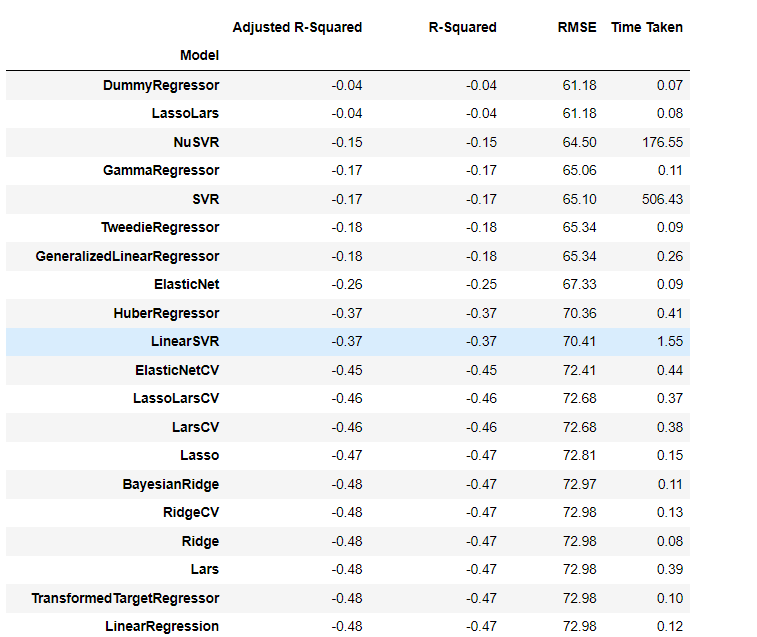

In [67]:
# reg.models.items()

### Scaling the X and y sets

In [139]:
print('Train: ', X_train.shape)
print('Test:', X_test.shape)
print('Samples: ', y_train.shape)
print('Targets: ', y_test.shape)

X_train_scaled = X_train
X_test_scaled = X_test

Train:  (75757, 20)
Test: (9705, 20)
Samples:  (75757,)
Targets:  (9705,)


In [140]:
# sc = StandardScaler()
# X_train_scaled = sc.fit_transform(X_train)
# X_train_scaled = pd.DataFrame(data = X_train_scaled, columns = X_train.columns)

In [141]:
# X_test_scaled = sc.transform(X_test)
# X_test_scaled = pd.DataFrame(data = X_test_scaled, columns = X_test.columns)

In [142]:
# X_train_scaled

In [143]:
# X_test_scaled

## Used Lazy Predict to check the LGBMRegressor works best

# Modelling

### XGBoost Regressor

In [158]:
xgb = XGBRegressor(n_estimators=500, reg_alpha=0.1, n_jobs=-1)
xgb.fit(X_train_scaled, y_train)
y_pred = xgb.predict(X_test_scaled)

print(" Training data scores\n","--"*10)
print(" RMSE:", np.sqrt(mean_squared_error(y_test,y_pred)))
print(" MAE:", mean_absolute_error(y_test,y_pred))
print(" MSE:", mean_squared_error(y_test,y_pred))
print(" R2:", r2_score(y_test,y_pred))

 Training data scores
 --------------------
 RMSE: 80.30677178890978
 MAE: 50.63854348745503
 MSE: 6449.177595156036
 R2: -0.7836705772896226


### LGBMRegressor

In [171]:
import lightgbm as ltb
model_lgbm = ltb.LGBMRegressor()
model_lgbm.fit(X_train_scaled, y_train)
print(model)

y_pred = model_lgbm.predict(X_test_scaled)

print(" Training data scores\n","--"*10)
print(" RMSE:", np.sqrt(mean_squared_error(y_test,y_pred)))
print(" MAE:", mean_absolute_error(y_test,y_pred))
print(" MSE:", mean_squared_error(y_test,y_pred))
print(" R2:", r2_score(y_test,y_pred))

LassoLarsCV(cv=KFold(n_splits=5, random_state=None, shuffle=True), n_jobs=1,
            verbose=True)
 Training data scores
 --------------------
 RMSE: 76.20292462927603
 MAE: 49.3686473336897
 MSE: 5806.885722055123
 R2: -0.6060297697325747


## LassoLars Regressor

In [160]:
lassoLar_model = LassoLars()
lassoLar_model.fit(X_train_scaled, y_train)
print(); print(lassoLar_model)

y_pred = lassoLar_model.predict(X_test_scaled)

print(" Training data scores\n","--"*10)
print(" RMSE:", np.sqrt(mean_squared_error(y_test,y_pred)))
print(" MAE:", mean_absolute_error(y_test,y_pred))
print(" MSE:", mean_squared_error(y_test,y_pred))
print(" R2:", r2_score(y_test,y_pred))


LassoLars()
 Training data scores
 --------------------
 RMSE: 61.18129487305607
 MAE: 40.32026876809191
 MSE: 3743.1508423438368
 R2: -0.03525572452219494


## SVR Support Vector Regressor

In [161]:
# svr_model = SVR()
# svr_model.fit(X_train, y_train)
# print(); print(svr_model)

# y_pred = svr_model.predict(X_test)

# print(" Training data scores\n","--"*10)
# print(" RMSE:", np.sqrt(mean_squared_error(y_test,y_pred)))
# print(" MAE:", mean_absolute_error(y_test,y_pred))
# print(" MSE:", mean_squared_error(y_test,y_pred))
# print(" R2:", r2_score(y_test,y_pred))

# Model Evaluation

In [193]:
error_rec = {
    "XGBoost": {
        "mae": 49.3686473336897,
        "rmse": 80.57648852229458,
    },
    "LGBMRegressor": {
        "mae": 49.3686473336897,
        "rmse": 76.20292462927603,
    },
    "LassoLars": {
        "mae": 40.32026876809191,
        "rmse": 61.18129487305607,
    },
    "SVR": {
        "mae": 37.89417093459106,
        "rmse": 63.35270772430757,
    },
}
pd.DataFrame(error_rec).plot(kind="bar", 
             color=[
                 sns.color_palette("pastel")[0], 
                 sns.color_palette("pastel")[1], 
                 sns.color_palette("pastel")[2], 
                 sns.color_palette("pastel")[3]]);

### Observation : 
MAE :  Mean Absolute Error

RMSE :  Root Mean Squared Error

Here based on above Scores and https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d

### Hyperparameter Tuning for "LASSO LARS"

### https://towardsdatascience.com/hyperparameter-tuning-in-lasso-and-ridge-regressions-70a4b158ae6d

In [163]:
cv = KFold(n_splits=5, shuffle=True)
# lasso_alphas = np.linspace(0, 0.002, 11)

lasso = LassoLarsCV( cv=cv, n_jobs=1 , verbose=True)
lasso.fit(X_train_scaled , y_train)

y_pred = lasso.predict(X_test_scaled)

print(" Training data scores\n","--"*10)
print(" RMSE:", np.sqrt(mean_squared_error(y_test,y_pred)))
print(" MAE:", mean_absolute_error(y_test,y_pred))
print(" MSE:", mean_squared_error(y_test,y_pred))
print(" R2:", r2_score(y_test,y_pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


 Training data scores
 --------------------
 RMSE: 72.98381532294478
 MAE: 47.36402654452906
 MSE: 5326.637299093709
 R2: -0.4732058601430156


In [164]:
lasso.get_params()

{'copy_X': True,
 'cv': KFold(n_splits=5, random_state=None, shuffle=True),
 'eps': 2.220446049250313e-16,
 'fit_intercept': True,
 'max_iter': 500,
 'max_n_alphas': 1000,
 'n_jobs': 1,
 'normalize': True,
 'positive': False,
 'precompute': 'auto',
 'verbose': True}

In [173]:
model = model_lgbm #Selecting LBGM Model as LassoLARS is not supported by SHAP yet.

# Explainable AI

Chosen LassoLARS Model to study the Explainable-AI

In [194]:
size = 2000

sample_exists = False

if sample_exists:
    sample_set = pd.read_csv('./sample2000.csv')
else:
    sample_set = X_test.sample(2000)
sample_set

Year_Factor  floor_area  year_built  energy_star_rating  ELEVATION  \
6936            7   12.148555      2011.0              -999.0      186.5   
7707            7   11.727658      1968.0                84.0      229.8   
9688            7   13.305580      1959.0                75.0      130.8   
483             7   10.522369      1957.0                98.0       43.9   
3497            7    9.985759      1990.0              -999.0      812.0   
...           ...         ...         ...                 ...        ...   
8851            7   12.994530      1999.0                56.0      130.8   
2556            7    9.928473      1987.0              -999.0      812.0   
7911            7   12.182717      2016.0                66.0      231.3   
6157            7   11.655197      1905.0                84.0      241.4   
5006            7   12.692242      1978.0                78.0       15.2   

      cooling_degree_days  heating_degree_days  precipitation_inches  \
6936                  761                 5907                 42.55   
7707                  761                 5907                 42.55   
9688                  866                 5264                 43.54   
483                   342                 2112                 25.24   
3497                  345                 4478                 44.83   
...                   ...                  ...                   ...   
8851                  866                 5264                 43.54   
2556                  345                 4478                 44.83   
7911                  761                 5907                 42.55   
6157                  761                 5907                 42.55   
5006                 1643                 3555                 41.06   

      snowfall_inches  snowdepth_inches  days_below_30F  days_below_10F  \
6936             10.2                17             108              14   
7707             10.2                17             108              14   
9688             27.3                51              97              13   
483               0.0                 0               0               0   
3497              4.0                10              17               0   
...               ...               ...             ...             ...   
8851             27.3                51              97              13   
2556              4.0                10              17               0   
7911             10.2                17             108              14   
6157             10.2                17             108              14   
5006              3.4                 6              45               0   

      days_below_0F  days_above_80F  days_above_90F  days_above_100F  \
6936              5              79              12                0   
7707              5              79              12                0   
9688              0              77               5                0   
483               0              29               5                2   
3497              0              39               3                0   
...             ...             ...             ...              ...   
8851              0              77               5                0   
2556              0              39               3                0   
7911              5              79              12                0   
6157              5              79              12                0   
5006              0             122              41                0   

      days_above_110F  te_State_Factor  te_building_class  te_facility_type  
6936                0        95.199291          85.755239         80.916723  
7707                0        95.199291          80.240957         83.878522  
9688                0        87.416018          80.240957         83.878522  
483                 0        62.196194          85.755239         77.074389  
3497                0        53.989234          80.240957         36.737

calculate shap values

In [195]:
is_saved = False

if is_saved:
    with open('data/shap/shap_values_sample2000.pkl', 'rb') as f:
        shap_values = joblib.load(f)
else:
    shap_values = shap.TreeExplainer(model).shap_values(sample_set)

In [196]:
shap.initjs()

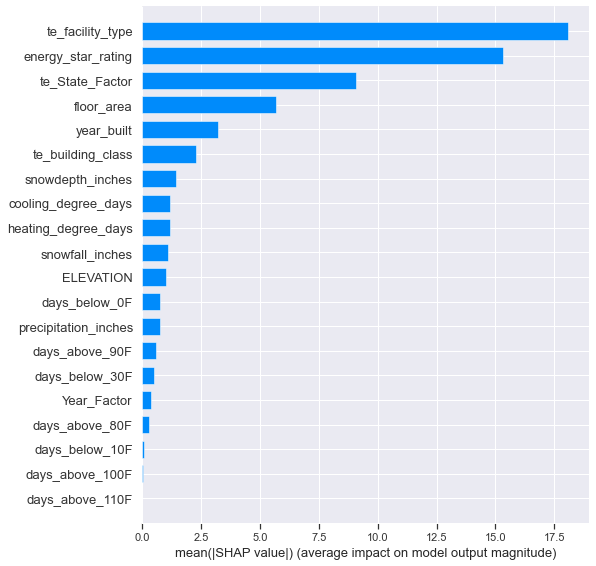

In [197]:
shap.summary_plot(shap_values, sample_set, plot_type="bar")

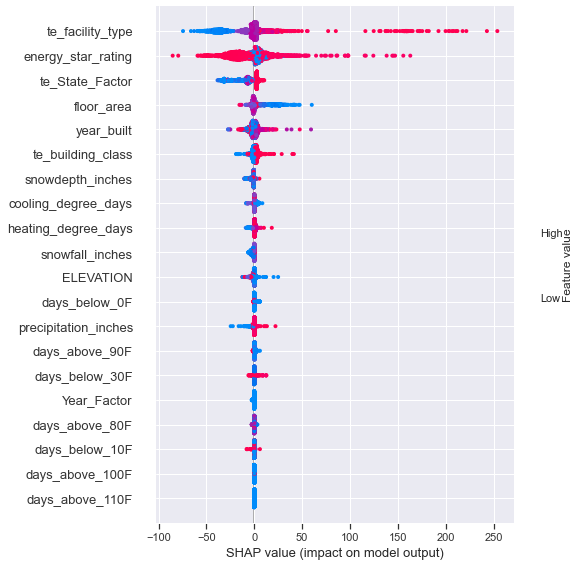

In [198]:
shap.summary_plot(shap_values, sample_set)

In [199]:
limit = 200
shap.force_plot(shap.TreeExplainer(model).expected_value[0], shap_values[0:limit,:], sample_set.iloc[0:limit,:])

In [200]:
row = 60
print(y_pred[row])
shap.initjs()
shap.force_plot(shap.TreeExplainer(model).expected_value[0], shap_values[row], sample_set.iloc[row])

62.63682436666107


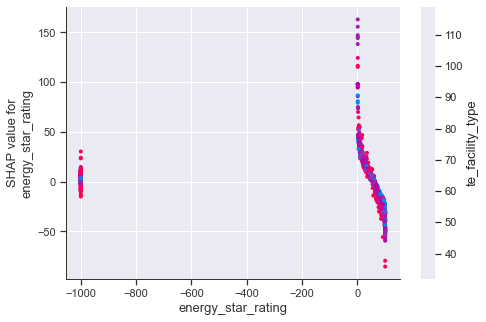

In [201]:
shap.dependence_plot('energy_star_rating', shap_values, sample_set)

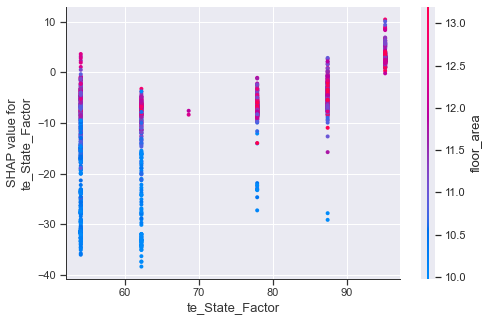

In [202]:
shap.dependence_plot('te_State_Factor', shap_values, sample_set)

In [203]:
row = 111
shap.plots._waterfall.waterfall_legacy(shap.TreeExplainer(model).expected_value[0], 
                                       shap_values[row],
                                       feature_names=sample_set.columns.tolist()
                                      )

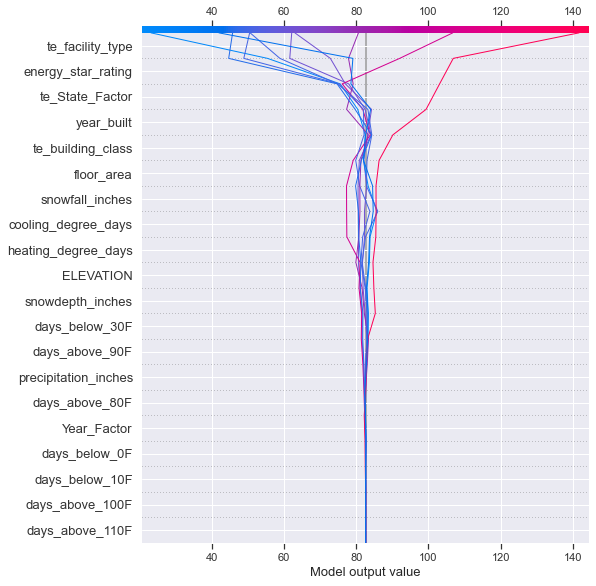

In [204]:
start = 120
limit = 130

shap.decision_plot(shap.TreeExplainer(model).expected_value[0], 
                   shap_values[start:limit], 
                   feature_names=sample_set.columns.tolist())

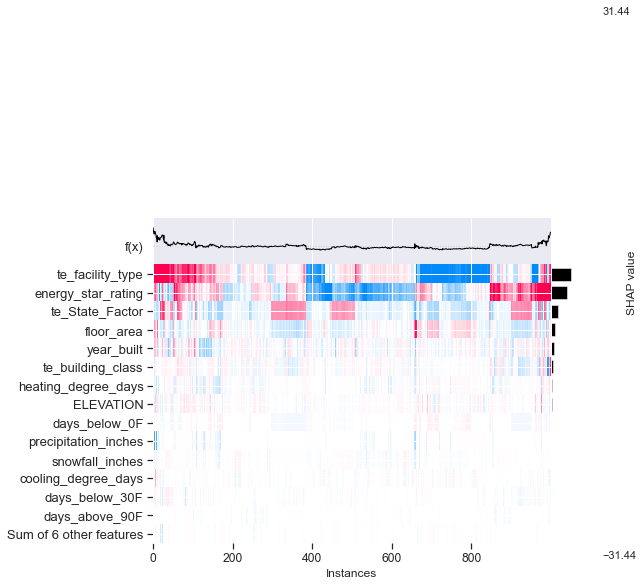

In [205]:
limit = 1000
shap.plots.heatmap(shap.TreeExplainer(model, data=sample_set)(sample_set[:limit]), max_display=15)